# testing different models for accuracy

In [1]:
#importing libraries
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
import scipy as sp
from joblib import dump
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("cs1_part3_res.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2916 entries, 0 to 2915
Columns: 229 entries, ms_subclass to sale_condition_Partial
dtypes: float64(38), int64(191)
memory usage: 5.1 MB


# lasso cv

In [4]:
#Create  and y 
X = df.drop('saleprice',axis=1)
y = df['saleprice']

from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
lasso_model = LassoCV()

In [7]:
lasso_model.fit(X_train,y_train)

LassoCV()

In [8]:
pred_test_lasso = lasso_model.predict(X_test)

In [9]:
pred_test_lasso

array([11.7383428 , 11.81419688, 12.29343431, 12.86916536, 12.03552457,
       12.41943395, 11.81531303, 11.86347057, 12.34900296, 11.69461479,
       11.77597266, 11.48010706, 11.84423586, 11.55722551, 12.29359068,
       11.81927639, 11.87012116, 11.43237605, 12.58812522, 12.35531201,
       11.85107585, 11.49943328, 11.8291375 , 12.23941965, 12.18552123,
       11.92927302, 11.52962212, 11.73356249, 11.62008021, 11.9393835 ,
       12.21308519, 12.01950945, 11.58618363, 11.74991755, 12.32116784,
       11.73147422, 12.23977473, 12.16078613, 11.71305815, 11.7563332 ,
       12.05205365, 12.58314481, 11.76005033, 11.63475124, 11.72931908,
       12.30888863, 12.31239032, 12.34699907, 12.0747628 , 11.73944388,
       11.4944678 , 12.35314931, 11.0672706 , 12.28713452, 11.50238755,
       11.76311559, 11.86146511, 11.68241874, 11.7747052 , 12.6196594 ,
       11.95381493, 11.51917848, 12.02591433, 11.8156279 , 12.30176039,
       11.88485987, 12.37794877, 12.09519063, 11.46266623, 12.10

In [10]:
MAE_Lasso = mean_absolute_error(y_test,pred_test_lasso)
MSE_Lasso = mean_squared_error(y_test,pred_test_lasso)
RMSE_Lasso = np.sqrt(MSE_Lasso)

In [11]:
MAE_Lasso

0.07829473134860467

In [12]:
MSE_Lasso

0.014000491739232113

In [13]:
RMSE_Lasso

0.11832367362126699

In [14]:
def MAPE(y_test,pred_test_lasso):
    mape = np.mean(np.abs((y_test - pred_test_lasso)/y_test))*100
    return mape

In [15]:
LR_MAPElassocv= MAPE(y_test,pred_test_lasso)

In [16]:
print("lassocv MAPE: ",LR_MAPElassocv)

lassocv MAPE:  0.6563420379206504


In [17]:
print("Best alpha using built-in LassoCV: %f" % lasso_model.alpha_)
print("Best score using built-in LassoCV: %f" %lasso_model.score(X,y))
coef = pd.Series(lasso_model.coef_, index = X.columns)

Best alpha using built-in LassoCV: 0.002572
Best score using built-in LassoCV: -2052878.124931


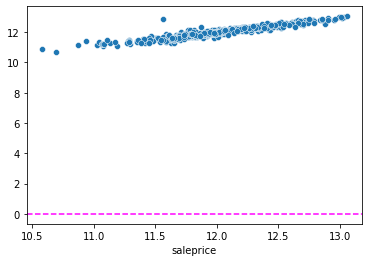

In [18]:
sns.scatterplot(x=y_test,y=pred_test_lasso)
plt.axhline(y=0,color='magenta',linestyle='--')

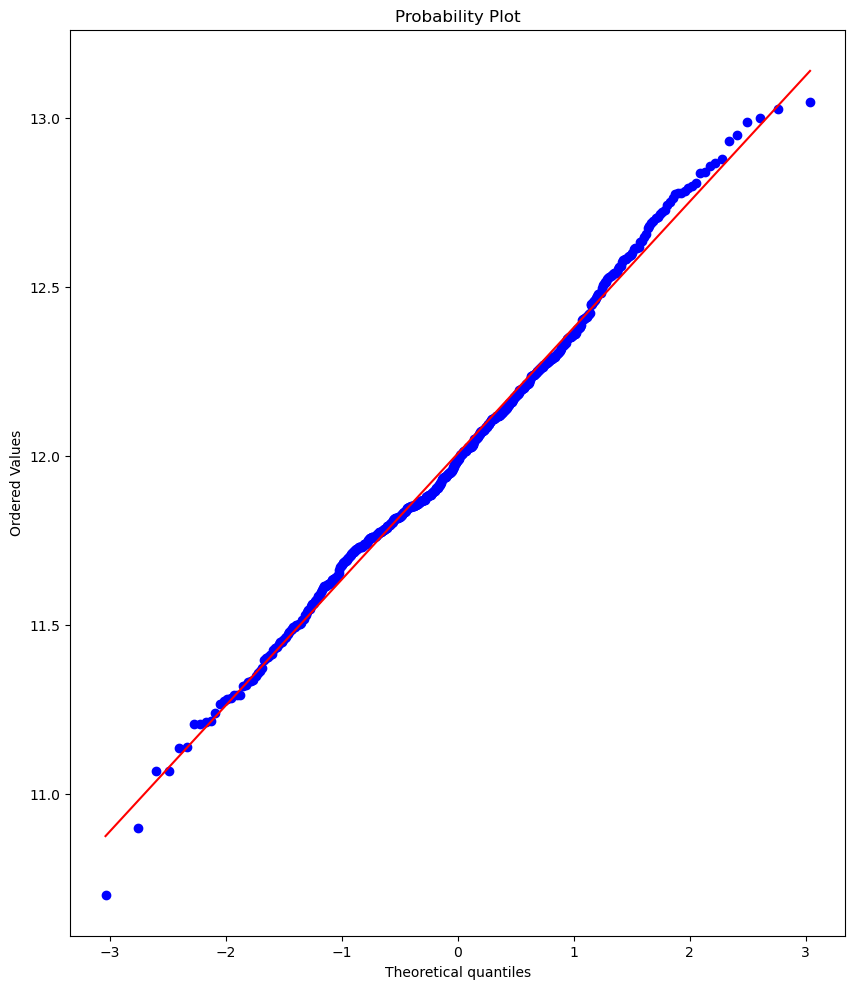

In [19]:
fig,ax = plt.subplots(figsize=(10,12),dpi=100)

_=sp.stats.probplot(pred_test_lasso,plot=ax)

In [20]:
100*RMSE_Lasso/df['saleprice'].mean()

0.9844819485397567

# linear regression

In [21]:
#Create  and y 
X = df.drop('saleprice',axis=1)
y = df['saleprice']

from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [23]:
linear_model = LinearRegression()

In [24]:
linear_model.fit(X_train,y_train)

LinearRegression()

In [25]:
pred_linear_model = linear_model.predict(X_test)

In [26]:
pred_linear_model

array([ 1.15508403e+01,  1.21664477e+01,  1.16407681e+01,  1.30898135e+01,
        1.21875754e+01,  1.21950961e+01,  1.17624236e+01,  1.18142062e+01,
        1.19106398e+01,  1.18000098e+01,  1.16184831e+01,  1.19155532e+01,
        1.17315894e+01,  1.21993419e+01,  1.22906810e+01,  1.14495617e+01,
        1.18443900e+01,  1.18042856e+01,  1.15462422e+01,  1.17688757e+01,
        1.23178836e+01,  1.17763511e+01,  1.20264159e+01,  1.21464105e+01,
        1.25523215e+01,  1.12749716e+01,  1.25351640e+01,  1.13014704e+01,
        1.21056662e+01,  1.22011867e+01,  1.29562121e+01,  1.19925123e+01,
        1.12141238e+01,  1.22137476e+01,  1.19069320e+01,  1.18594752e+01,
        1.23230258e+01,  1.20267707e+01,  1.16973477e+01,  1.26653767e+01,
        1.17382093e+01,  1.26213934e+01,  1.16187268e+01,  1.25667562e+01,
        1.31701243e+01,  1.21826750e+01,  1.21605197e+01,  1.25753029e+01,
        1.20391780e+01,  1.17621527e+01,  1.21124898e+01,  1.25224467e+01,
        1.24040993e+01,  

In [27]:
MAE_Lr = mean_absolute_error(y_test,pred_linear_model)
MSE_Lr = mean_squared_error(y_test,pred_linear_model)
RMSE_Lr = np.sqrt(MSE_Lr)

In [28]:
MAE_Lr

207730551.4994402

In [29]:
MSE_Lr

1.269115871052125e+19

In [30]:
RMSE_Lr

3562465257.4476075

In [31]:
def MAPE(y_test,pred_linear_model):
    mape = np.mean(np.abs((y_test - pred_linear_model)/y_test))*100
    return mape

In [32]:
LR_MAPE= MAPE(y_test,pred_linear_model)

In [33]:
print("MAPE: ",LR_MAPE)

MAPE:  1794646420.821549


In [34]:
#print("Best alpha using built-in LassoCV: %f" % linear_model.alpha_)
print("Best score using built-in LassoCV: %f" %linear_model.score(X,y))
coef = pd.Series(linear_model.coef_, index = X.columns)

Best score using built-in LassoCV: -76214526198742001658101760.000000


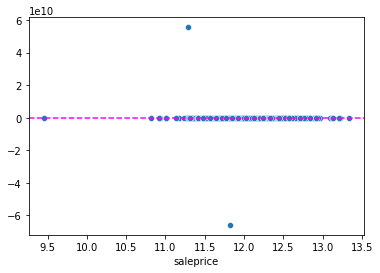

In [35]:
sns.scatterplot(x=y_test,y=pred_linear_model)
plt.axhline(y=0,color='magenta',linestyle='--')

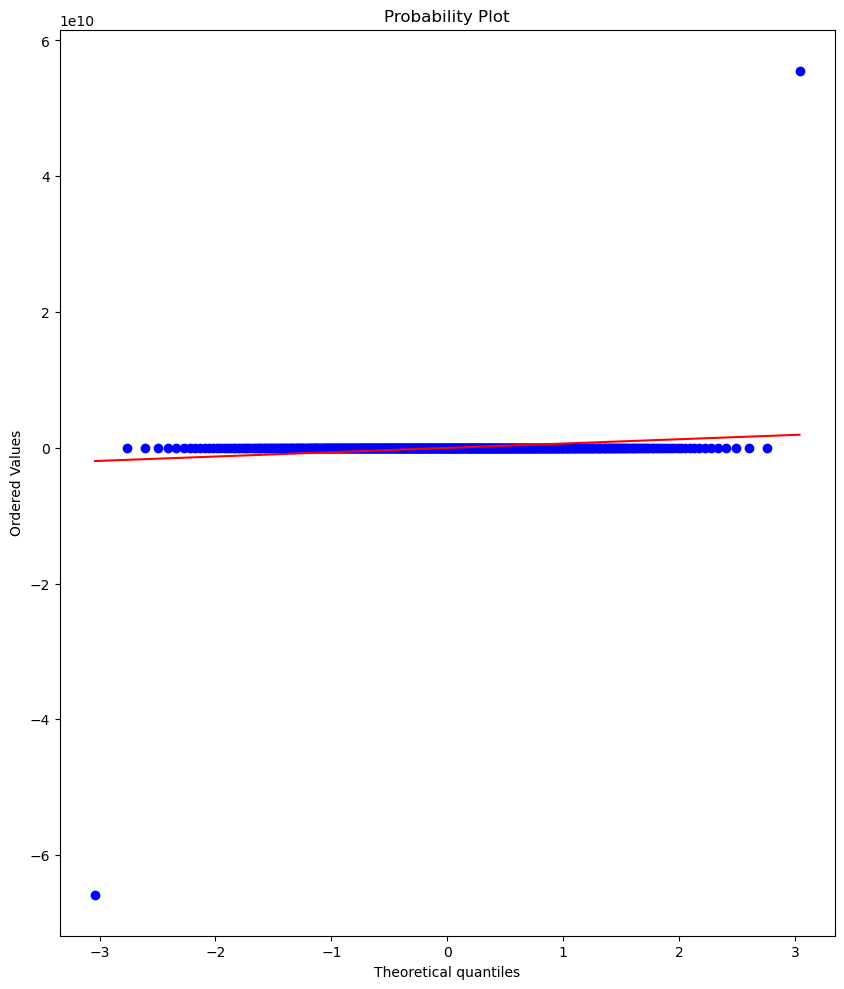

In [36]:
fig,ax = plt.subplots(figsize=(10,12),dpi=100)

_=sp.stats.probplot(pred_linear_model,plot=ax)

# Grid search with elastic cv

In [37]:
#Create  and y 
X = df.drop('saleprice',axis=1)
y = df['saleprice']

from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [38]:
#base_elastic_model = ElasticNet(max_iter=250000)
base_elastic_model = ElasticNet()

In [39]:
param_grid = {'alpha':[0.1,1,10,50,100],'l1_ratio':[0.1,0.5,0.7,0.9,1]}

In [40]:
#grid_model = GridSearchCV(estimator=base_elastic_model,param_grid=param_grid,scoring='neg_mean_squared_error',cv=10,verbose=2)
grid_model = GridSearchCV(estimator=base_elastic_model,param_grid=param_grid,scoring='neg_mean_squared_error',cv=10,verbose=2)

In [41]:
grid_model.fit(X_train,y_train)

Fitting 10 folds for each of 25 candidates, totalling 250 fits
[CV] alpha=0.1, l1_ratio=0.1 .........................................
[CV] .......................... alpha=0.1, l1_ratio=0.1, total=   0.0s
[CV] alpha=0.1, l1_ratio=0.1 .........................................
[CV] .......................... alpha=0.1, l1_ratio=0.1, total=   0.0s
[CV] alpha=0.1, l1_ratio=0.1 .........................................
[CV] .......................... alpha=0.1, l1_ratio=0.1, total=   0.0s
[CV] alpha=0.1, l1_ratio=0.1 .........................................
[CV] .......................... alpha=0.1, l1_ratio=0.1, total=   0.0s
[CV] alpha=0.1, l1_ratio=0.1 .........................................
[CV] .......................... alpha=0.1, l1_ratio=0.1, total=   0.0s
[CV] alpha=0.1, l1_ratio=0.1 .........................................
[CV] .......................... alpha=0.1, l1_ratio=0.1, total=   0.0s
[CV] alpha=0.1, l1_ratio=0.1 .........................................
[CV] .........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] .......................... alpha=0.1, l1_ratio=0.1, total=   0.0s
[CV] alpha=0.1, l1_ratio=0.5 .........................................
[CV] .......................... alpha=0.1, l1_ratio=0.5, total=   0.0s
[CV] alpha=0.1, l1_ratio=0.5 .........................................
[CV] .......................... alpha=0.1, l1_ratio=0.5, total=   0.0s
[CV] alpha=0.1, l1_ratio=0.5 .........................................
[CV] .......................... alpha=0.1, l1_ratio=0.5, total=   0.0s
[CV] alpha=0.1, l1_ratio=0.5 .........................................
[CV] .......................... alpha=0.1, l1_ratio=0.5, total=   0.0s
[CV] alpha=0.1, l1_ratio=0.5 .........................................
[CV] .......................... alpha=0.1, l1_ratio=0.5, total=   0.0s
[CV] alpha=0.1, l1_ratio=0.5 .........................................
[CV] .......................... alpha=0.1, l1_ratio=0.5, total=   0.0s
[CV] alpha=0.1, l1_ratio=0.5 .........................................
[CV] .

[CV] ............................ alpha=1, l1_ratio=0.7, total=   0.0s
[CV] alpha=1, l1_ratio=0.7 ...........................................
[CV] ............................ alpha=1, l1_ratio=0.7, total=   0.0s
[CV] alpha=1, l1_ratio=0.7 ...........................................
[CV] ............................ alpha=1, l1_ratio=0.7, total=   0.0s
[CV] alpha=1, l1_ratio=0.7 ...........................................
[CV] ............................ alpha=1, l1_ratio=0.7, total=   0.0s
[CV] alpha=1, l1_ratio=0.7 ...........................................
[CV] ............................ alpha=1, l1_ratio=0.7, total=   0.0s
[CV] alpha=1, l1_ratio=0.7 ...........................................
[CV] ............................ alpha=1, l1_ratio=0.7, total=   0.0s
[CV] alpha=1, l1_ratio=0.7 ...........................................
[CV] ............................ alpha=1, l1_ratio=0.7, total=   0.0s
[CV] alpha=1, l1_ratio=0.9 ...........................................
[CV] .

[CV] ............................. alpha=10, l1_ratio=1, total=   0.0s
[CV] alpha=10, l1_ratio=1 ............................................
[CV] ............................. alpha=10, l1_ratio=1, total=   0.0s
[CV] alpha=10, l1_ratio=1 ............................................
[CV] ............................. alpha=10, l1_ratio=1, total=   0.0s
[CV] alpha=10, l1_ratio=1 ............................................
[CV] ............................. alpha=10, l1_ratio=1, total=   0.0s
[CV] alpha=10, l1_ratio=1 ............................................
[CV] ............................. alpha=10, l1_ratio=1, total=   0.0s
[CV] alpha=10, l1_ratio=1 ............................................
[CV] ............................. alpha=10, l1_ratio=1, total=   0.0s
[CV] alpha=10, l1_ratio=1 ............................................
[CV] ............................. alpha=10, l1_ratio=1, total=   0.0s
[CV] alpha=10, l1_ratio=1 ............................................
[CV] .

[CV] .......................... alpha=100, l1_ratio=0.5, total=   0.0s
[CV] alpha=100, l1_ratio=0.5 .........................................
[CV] .......................... alpha=100, l1_ratio=0.5, total=   0.0s
[CV] alpha=100, l1_ratio=0.5 .........................................
[CV] .......................... alpha=100, l1_ratio=0.5, total=   0.0s
[CV] alpha=100, l1_ratio=0.5 .........................................
[CV] .......................... alpha=100, l1_ratio=0.5, total=   0.0s
[CV] alpha=100, l1_ratio=0.5 .........................................
[CV] .......................... alpha=100, l1_ratio=0.5, total=   0.0s
[CV] alpha=100, l1_ratio=0.5 .........................................
[CV] .......................... alpha=100, l1_ratio=0.5, total=   0.0s
[CV] alpha=100, l1_ratio=0.7 .........................................
[CV] .......................... alpha=100, l1_ratio=0.7, total=   0.0s
[CV] alpha=100, l1_ratio=0.7 .........................................
[CV] .

[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:    3.1s finished


GridSearchCV(cv=10, estimator=ElasticNet(),
             param_grid={'alpha': [0.1, 1, 10, 50, 100],
                         'l1_ratio': [0.1, 0.5, 0.7, 0.9, 1]},
             scoring='neg_mean_squared_error', verbose=2)

In [42]:
grid_model.best_params_

{'alpha': 0.1, 'l1_ratio': 0.1}

In [43]:
grid_model.best_estimator_

ElasticNet(alpha=0.1, l1_ratio=0.1)

In [44]:
y_pred = grid_model.predict(X_test)

In [45]:
mean_squared_error(y_test,y_pred)

0.013726411864978113

In [46]:
RMSE = np.sqrt(mean_squared_error(y_test,y_pred))
RMSE

0.11715977067653432

In [47]:
test_prob = y_test - y_pred

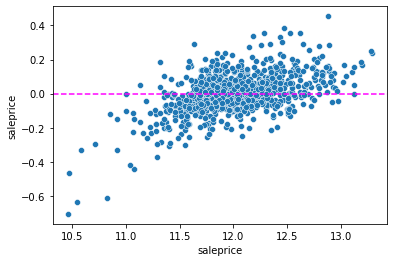

In [48]:
sns.scatterplot(x=y_test,y=test_prob)
plt.axhline(y=0,color='magenta',linestyle='--')

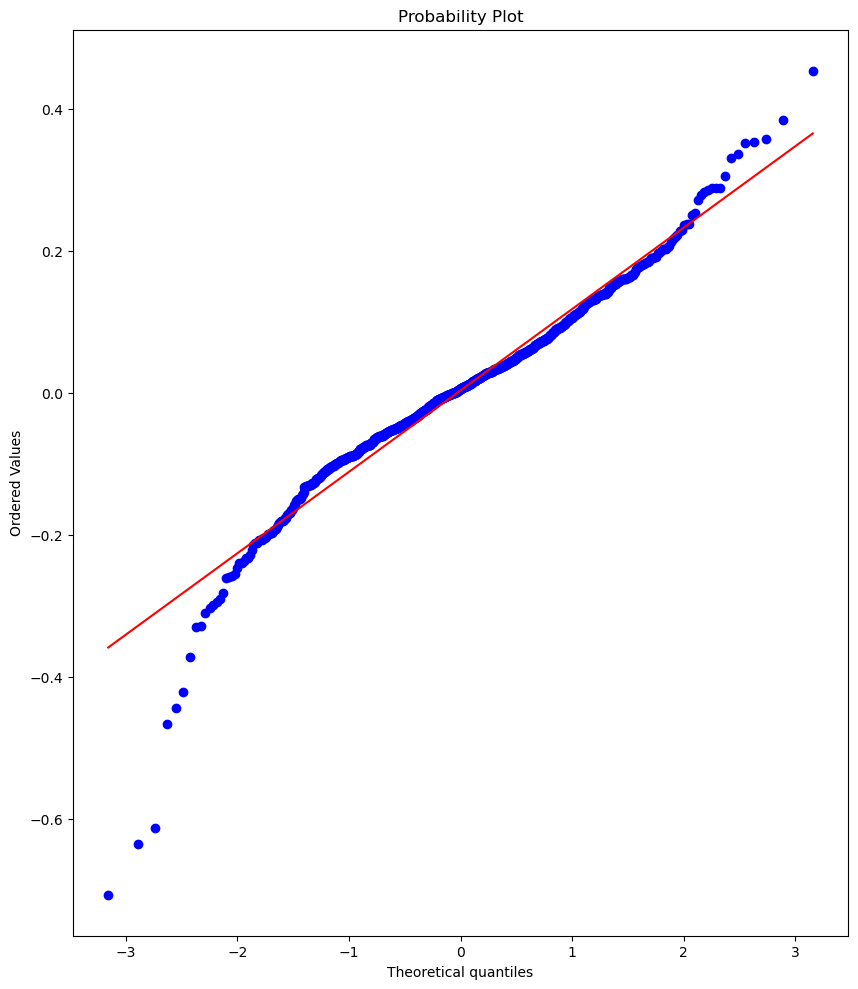

In [49]:
fig,ax = plt.subplots(figsize=(10,12),dpi=100)

_=sp.stats.probplot(test_prob,plot=ax)

In [50]:
def MAPE(y_test,y_pred):
    mape = np.mean(np.abs((y_test - y_pred)/y_test))*100
    return mape

In [51]:
LR_MAPEgrid= MAPE(y_test,y_pred)

In [52]:
print("MAPE: ",LR_MAPEgrid)

MAPE:  0.7084285541275762


# Ridge model

In [53]:
#Create  and y 
X = df.drop('saleprice',axis=1)
y = df['saleprice']

from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [54]:
ridge_model = Ridge(alpha=10)

In [55]:
ridge_model.fit(X_train,y_train)

Ridge(alpha=10)

In [56]:
pred_test_ridge = ridge_model.predict(X_test)

In [57]:
pred_test_ridge

array([12.49475657, 11.61864582, 12.16776412, 11.84433401, 11.60485556,
       12.15053006, 12.28905853, 12.36568881, 12.00926211, 12.64246066,
       11.2675521 , 11.85248499, 12.07283008, 11.65789455, 11.78365339,
       12.97158442, 11.5378669 , 11.64024622, 12.52581605, 11.67170999,
       12.09311487, 12.23209892, 11.73193827, 11.7013675 , 12.69446045,
       11.77914027, 12.57733472, 11.29808775, 11.97708821, 11.66776139,
       12.22695373, 11.34211808, 12.45222499, 11.69630781, 11.81360992,
       12.15135832, 11.34076867, 12.11102906, 11.71666445, 11.3595509 ,
       12.37370653, 12.18754624, 12.2450048 , 11.9116334 , 12.29412396,
       12.18301814, 11.89035559, 11.89980663, 13.15069481, 12.22501326,
       11.28272597, 11.84328727, 11.8813109 , 11.59325566, 11.93205518,
       11.90153615, 12.07452607, 11.88899007, 12.65138398, 11.56057046,
       11.8786021 , 12.60426627, 12.14161554, 11.89032846, 12.64328819,
       12.22405166, 11.94941313, 11.8797583 , 11.92774096, 11.93

In [58]:
MAE_ridge = mean_absolute_error(y_test,pred_test_ridge)
MSE_ridge = mean_squared_error(y_test,pred_test_ridge)
RMSE_ridge = np.sqrt(MSE_ridge)

In [59]:
MAE_ridge

0.08250453012846906

In [60]:
MSE_ridge

0.020269678581679728

In [61]:
RMSE_ridge

0.14237162140567103

In [62]:
def MAPE(y_test,pred_test_ridge):
    mape = np.mean(np.abs((y_test - pred_test_ridge)/y_test))*100
    return mape

In [63]:
LR_MAPEridge= MAPE(y_test,pred_test_ridge)

In [64]:
print("MAPE: ",LR_MAPEridge)

MAPE:  0.7003927459922745


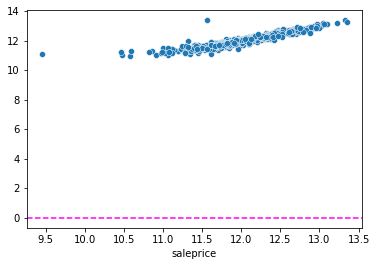

In [65]:
sns.scatterplot(x=y_test,y=pred_test_ridge)
plt.axhline(y=0,color='magenta',linestyle='--')

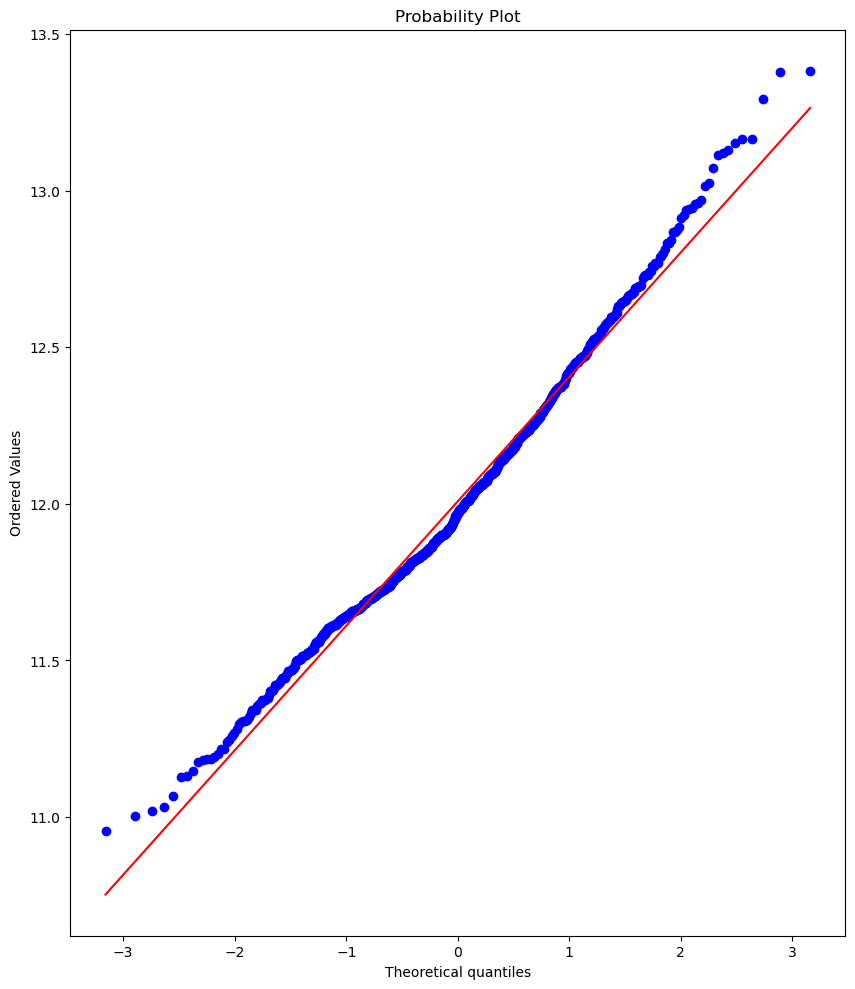

In [66]:
fig,ax = plt.subplots(figsize=(10,12),dpi=100)

_=sp.stats.probplot(pred_test_ridge,plot=ax)

# elastic model

In [67]:
#Create  and y 
X = df.drop('saleprice',axis=1)
y = df['saleprice']

from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [68]:
elastic_model = ElasticNet()

In [69]:
elastic_model.fit(X_train,y_train)

ElasticNet()

In [70]:
pred_test_elastic = elastic_model.predict(X_test)

In [71]:
pred_test_elastic

array([12.03117144, 12.03117144, 12.03117144, 12.03117144, 12.03117144,
       12.03117144, 12.03117144, 12.03117144, 12.03117144, 12.03117144,
       12.03117144, 12.03117144, 12.03117144, 12.03117144, 12.03117144,
       12.03117144, 12.03117144, 12.03117144, 12.03117144, 12.03117144,
       12.03117144, 12.03117144, 12.03117144, 12.03117144, 12.03117144,
       12.03117144, 12.03117144, 12.03117144, 12.03117144, 12.03117144,
       12.03117144, 12.03117144, 12.03117144, 12.03117144, 12.03117144,
       12.03117144, 12.03117144, 12.03117144, 12.03117144, 12.03117144,
       12.03117144, 12.03117144, 12.03117144, 12.03117144, 12.03117144,
       12.03117144, 12.03117144, 12.03117144, 12.03117144, 12.03117144,
       12.03117144, 12.03117144, 12.03117144, 12.03117144, 12.03117144,
       12.03117144, 12.03117144, 12.03117144, 12.03117144, 12.03117144,
       12.03117144, 12.03117144, 12.03117144, 12.03117144, 12.03117144,
       12.03117144, 12.03117144, 12.03117144, 12.03117144, 12.03

In [72]:
MAE_elastic = mean_absolute_error(y_test,pred_test_elastic)
MSE_elastic = mean_squared_error(y_test,pred_test_elastic)
RMSE_elastic = np.sqrt(MSE_ridge)

In [73]:
MAE_elastic

0.30309537011986665

In [74]:
MSE_elastic

0.15655132119263493

In [75]:
RMSE_elastic

0.14237162140567103

In [76]:
def MAPE(y_test,pred_test_elastic):
    mape = np.mean(np.abs((y_test - pred_test_elastic)/y_test))*100
    return mape

In [77]:
LR_MAPEelastic= MAPE(y_test,pred_test_elastic)

In [78]:
print("MAPE: ",LR_MAPEelastic)

MAPE:  2.5402328425410614


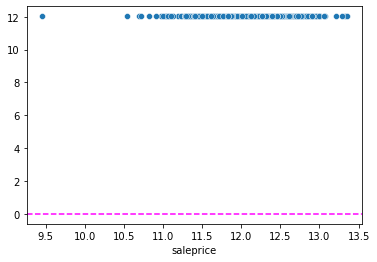

In [79]:
sns.scatterplot(x=y_test,y=pred_test_elastic)
plt.axhline(y=0,color='magenta',linestyle='--')

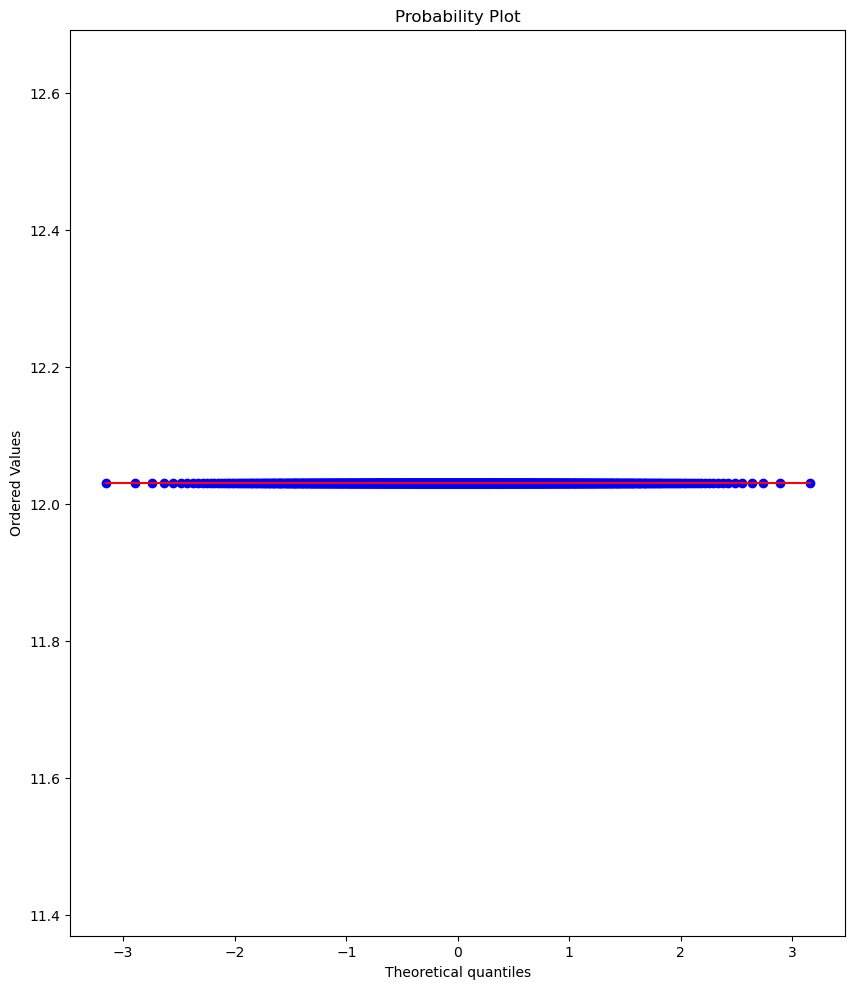

In [80]:
fig,ax = plt.subplots(figsize=(10,12),dpi=100)

_=sp.stats.probplot(pred_test_elastic,plot=ax)

# ridge cv

In [81]:
#Create  and y 
X = df.drop('saleprice',axis=1)
y = df['saleprice']

from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [82]:
ridgecv_model = RidgeCV()

In [83]:
ridgecv_model.fit(X_train,y_train)

RidgeCV(alphas=array([ 0.1,  1. , 10. ]))

In [84]:
pred_test_ridgecv = ridgecv_model.predict(X_test)

In [85]:
pred_test_ridgecv

array([11.74292033, 11.66479851, 12.07368019, 12.01739189, 11.55027477,
       12.21537539, 12.00140998, 12.76406875, 12.71347869, 11.4849255 ,
       12.63316397, 12.05635734, 12.36292628, 12.12783079, 12.13800907,
       11.91965679, 12.17772004, 11.51913549, 11.4104233 , 12.41001164,
       11.68346505, 11.91960469, 12.40331064, 12.10283447, 11.88692337,
       11.80592295, 12.57367497, 12.26268456, 12.20205357, 12.45211934,
       11.32324495, 11.85161312, 11.87247966, 12.74225716, 12.30939836,
       11.51160128, 11.66864917, 11.76983461, 11.66829266, 12.44252674,
       11.69432941, 11.62780044, 11.83353883, 12.37770592, 11.74831861,
       12.43824395, 12.49323443, 12.18420102, 12.40926874, 11.55599276,
       12.14046599, 11.87655567, 12.35569233, 12.44299919, 11.67814718,
       11.60980497, 11.6151952 , 12.15197062, 11.68874026, 11.65236282,
       12.64150623, 11.64324114, 11.90594525, 12.30013988, 11.94203918,
       12.15572496, 11.63654989, 11.8597788 , 12.08788964, 12.22

In [86]:
MAE_ridgecv = mean_absolute_error(y_test,pred_test_ridgecv)
MSE_ridgecv = mean_squared_error(y_test,pred_test_ridgecv)
RMSE_ridgecv = np.sqrt(MSE_ridge)

In [87]:
MAE_ridgecv

0.08293989671692657

In [88]:
MSE_ridgecv 

0.018798464316765604

In [89]:
RMSE_ridgecv 

0.14237162140567103

In [90]:
def MAPE(y_test,pred_test_ridgecv):
    mape = np.mean(np.abs((y_test - pred_test_elastic)/y_test))*100
    return mape

In [91]:
LR_MAPEridgecv= MAPE(y_test,pred_test_ridgecv)

In [92]:
print("MAPE: ",LR_MAPEridgecv)

MAPE:  2.565590256596199


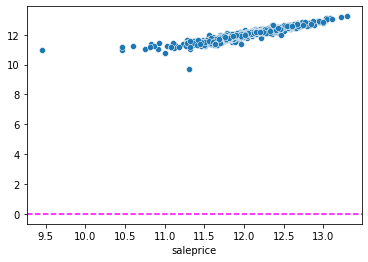

In [93]:
sns.scatterplot(x=y_test,y=pred_test_ridgecv)
plt.axhline(y=0,color='magenta',linestyle='--')

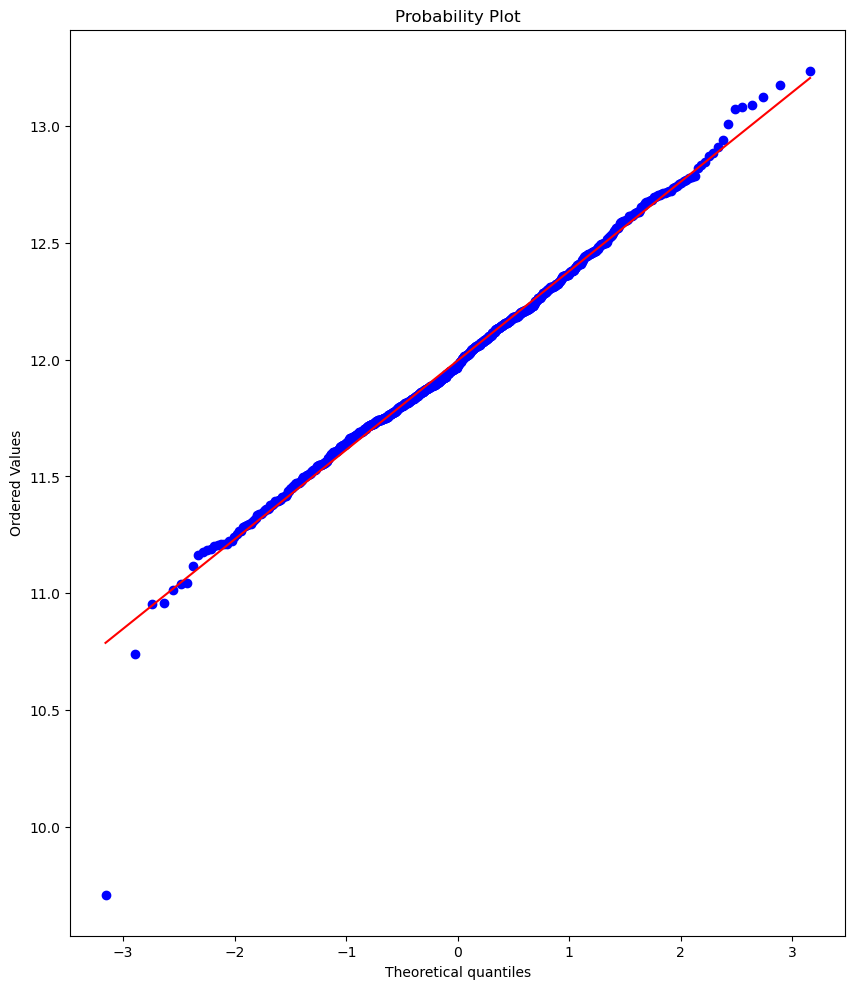

In [94]:
fig,ax = plt.subplots(figsize=(10,12),dpi=100)

_=sp.stats.probplot(pred_test_ridgecv,plot=ax)

In [95]:
print("lasso cv: \t",LR_MAPElassocv)

lasso cv: 	 0.6563420379206504


In [96]:
print("Linear regression\t",LR_MAPE)


Linear regression	 1794646420.821549


In [101]:
print("Gridcv with elastic :\t",LR_MAPEgrid)


Gridcv with elastic :	 0.7084285541275762


In [98]:
print("ridge :\t",LR_MAPEridge)


ridge :	 0.7003927459922745


In [99]:
print("elastic :\t",LR_MAPEelastic)


elastic :	 2.5402328425410614


In [100]:
print("ridge cv: \t",LR_MAPEridgecv)

ridge cv: 	 2.565590256596199
